<a href="https://colab.research.google.com/github/daniilomendes/Estatistica/blob/main/Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estatística 1

Amostragem Simples

In [127]:
#bibliotecas
import pandas as pd
import numpy as np

In [128]:
#base de dados
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/16.Prática em Python/dados/iris.csv')
base

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [129]:
#verificando o tamanho
base.shape

(150, 5)

In [130]:
#Mudança da semente aleatoria para manter os resultados em varias execuções
np.random.seed(2345)

#150 amostras, de 0 e 1, com reposição e probabilidades equivalentes
amostra = np.random.choice(a = [0, 1], size = 150, replace = True, p = [0.7, 0.3])

#verificar tamanho da amostra
len(amostra)

#verificar o tamanho da amostra para os valores igual a 1 e 0
len(amostra[amostra == 1])
len(amostra[amostra == 0])

amostra

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [131]:
#registros que serão selecionados onde a amostra for == 0
base_final = base.loc[amostra == 0]
base_final.shape

(101, 5)

Amostragem Sistemática

In [132]:
#pegar o maior valor de uma divisão
from math import ceil

In [133]:
#criação das variaveis para representar a população, a amostra e o valor de k
populacao = 100
amostra = 10
k = ceil(populacao / amostra)
print(k)

10


In [134]:
#definição do valor randômico para inicializar a mostra, iniciando em 1 até k + 1
r = np.random.randint(low = 1, high = k + 1, size = 1)
print(r)

[10]


In [135]:
#criar um for para somar os próximos valores, baseado no primeiro valor r que foi definido acima
acumulador = r[0]
sorteados = []

for i in range(amostra):
	#print(acumulador)
	sorteados.append(acumulador)
	acumulador += k
print(sorteados)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [136]:
#verificar a quantidade de valores
len(sorteados)

10

In [137]:
#carregamos a base de dados e criamos a base final somente com os valores sorteados
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/16.Prática em Python/dados/iris.csv')
base_final = base.loc[sorteados]
base_final

,sepal length,sepal width,petal length,petal width,class
10,5.4,3.7,1.5,0.2,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


Amostragem Estratificada

In [138]:
#divisão de base de dados(separar amostras)
from sklearn.model_selection import train_test_split

In [139]:
#Contagem de quantos registros existem por classe
iris = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/16.Prática em Python/dados/iris.csv')
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [140]:
#iris.iloc[:, 0:4]: buscamos somente os atributos previsores, ou seja, os dados sobre a pétala e sétala da planta
#iris.ilov[:, 4]: buscamos somente a clasee, que é a especie da planta(setosa, virginiica ou versicolor)
#test_size: selecioamos 50% da base e dados, que serão copiados para as variaveis x e y. Essa função retorna 4 valores,
#porém, vamos usar somente os 50% da base de dados e por isso colocamos "_" para os outros valores
#stratify: para retornar a amostra baseada na classe
x, _, y, _ = train_test_split(iris.iloc[:, 0:4], iris.iloc[:, 4], test_size = 0.5, stratify = iris.iloc[:, 4])

y.value_counts() 

Iris-setosa        25
Iris-versicolor    25
Iris-virginica     25
Name: class, dtype: int64

In [141]:
#importando a base de dados e contagem de registros
infert = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/16.Prática em Python/dados/infert.csv')
infert

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


In [142]:
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [143]:
#criando uma amostra com somente 40% dos registros(por isso é definido 0.6,pois é gerado o inverso)
x1, _, y1, _ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:, 1], test_size = 0.6, stratify = infert.iloc[:, 4])

y1.value_counts()

12+ yrs    52
6-11yrs    46
0-5yrs      1
Name: education, dtype: int64

Medidas de Centralidade e Variabilidade

In [144]:
#scipy para gerar estatísticas mais detalhada
from scipy import stats

In [145]:
#criação da variável com os dados dos jogadores, visualização da mediana e média
jogadores = [1041, 881, 1007, 895, 761, 1036, 1114, 980, 970, 1062]
np.mean(jogadores)

974.7

In [146]:
np.median(jogadores)

993.5

In [147]:
#criação da variável para a geralção dos quartis(0%, 25%, 50%, 75% e 100%)
quartis = np.quantile(jogadores, [0, 0.25, 0.5, 0.75, 1])
quartis

array([ 761.  ,  913.75,  993.5 , 1039.75, 1114.  ])

In [148]:
#visualização do desvio padrão
np.std(jogadores, ddof = 1)

103.85465270698703

In [149]:
#visualização de estatisticas mais detalhadas usando a bibliteca scipy
stats.describe(jogadores)

DescribeResult(nobs=10, minmax=(761, 1114), mean=974.7, variance=10785.788888888888, skewness=-0.7490758774812359, kurtosis=-0.16425516090516146)

Distribuição Normal

In [150]:
#importando a função norm
from scipy.stats import norm

In [151]:
#conjunto de objetos em um cesta, a media é 8 e o desvio é 2
#qual a probabilidade de tirar um objetos que peso é menos que 6 quilos?
norm.cdf(6, 8, 4)

0.3085375387259869

In [152]:
#qual a probabilidade de tirar um bjetos que o peso é maior que 6 quilo?
norm.cdf(6, 8, 2)
1 - norm.cdf(6, 8, 2)

0.8413447460685429

In [153]:
#qual a probabilidade de tirar um objeto que o peso é menor que 6 ou mair que 10 quilos?
norm.cdf(6, 8, 2) + norm.sf(10, 8, 2)

0.31731050786291415

In [154]:
#qual a probabilidade de tirar um objetos que o peso é menor que 10 e acima de 8 quilos?
norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2)

0.3413447460685429

Testes de normalidade

In [155]:
#importando matplotlib para geração de graficos
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt

In [156]:
#criação de uma variavel com dados em uma distribuição normal com a função rvs(100 elementos)
dados = norm.rvs(size = 1000)
#dados

Text(0.5, 1.0, 'Dados')

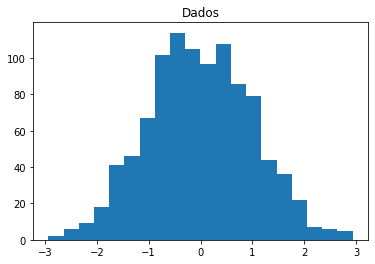

In [157]:
#histogrma
plt.hist(dados, bins = 20)
plt.title('Dados')

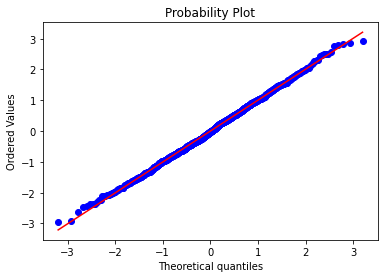

In [158]:
#geração de graficos para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(dados, fit = True, plot = ax)
plt.show()

In [159]:
#execução do teste de shapiro
#segundo argumento é o valor de p, não há como rejeitar a hipótese nula
stats.shapiro(dados)

ShapiroResult(statistic=0.9984634518623352, pvalue=0.530997097492218)

In [160]:
#dados não normais
dados2 = skewnorm.rvs(4, size = 1000)

Text(0.5, 1.0, 'Dados')

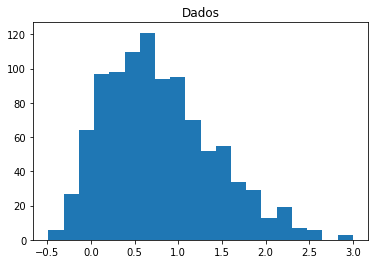

In [161]:
#histograma
plt.hist(dados2, bins = 20)
plt.title('Dados')

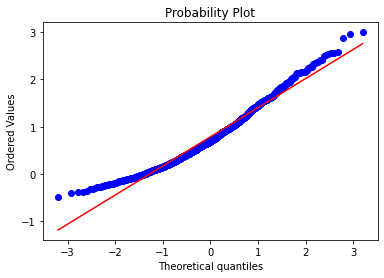

In [162]:
#geração de graficos para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(dados2, fit = True, plot = ax)
plt.show()

In [163]:
stats.shapiro(dados2)

ShapiroResult(statistic=0.971502423286438, pvalue=4.212092100889381e-13)

#Estatística 2

Distribuição T Student

In [164]:
#importando função para o teste
from scipy.stats import t

In [165]:
#Média de salário dos cientistas de dados = 75 por hora, Amostra com 9 funcionarios e desvio padrão 10

#qual a probabilidade de o salario ser menor que 80
t.cdf(1.5, 8)

0.9139983540240443

In [166]:
#qual a probabilidade do salario ser maior que 80
t.sf(1.5, 8)

0.08600164597595565

In [167]:
#somatorio da execução dos dous codigoos acima
t.cdf(1.5, 8) + t.sf(1.5, 8)

0.9999999999999999

Distribuição de Poison

In [168]:
#importando função
from scipy.stats import poisson

In [169]:
#média de acidentes de carros é 2 por dia
#qual a probabilidade de ocorrerem 3 acidentes no dia?
poisson.pmf(3, 2)

0.18044704431548356

In [170]:
#qual a probabilidade de ocorrerem 3 ou menos acidentes no dia?
poisson.cdf(3, 2)

0.857123460498547

In [171]:
#qual a probabilidade de ocorrerem mais de 3 acidentes no dia?
poisson.sf(3, 2)

0.14287653950145296

In [172]:
poisson.cdf(3, 2) + poisson.sf(3, 2)

1.0

Distribuição Binomial

In [173]:
#importando função binom
from scipy.stats import binom

In [174]:
#jogar uma modea 5 vezes, qual a probabilidade de dar cara 3 vezes?
#(eventos, experimento, probabilidade)
prob = binom.pmf(3, 5, 0.5)
prob

0.31249999999999983

In [175]:
#passar por 4 sinais de 4 tempos, qual a probabilidade de pegar o sinal verde?
#nenhuma, 1, 2, 3, ou 4 vezes seguidas?
binom.pmf(0, 4, 0.25) + binom.pmf(1, 4, 0.25)  + binom.pmf(2, 4, 0.25) + binom.pmf(3, 4, 0.25) + binom.pmf(4, 4, 0.25)

1.0000000000000002

In [176]:
#e se for sinais de dois tempos?
binom.pmf(4, 4, 0.5)

0.0625

In [177]:
#probabilidade acumulativa
binom.cdf(4, 4, 0.25)

1.0

In [178]:
#concurso com 12 questões, qual a probabilidade de acertar  questões considerando
#que cada questão tem 4 alternativas?
binom.pmf(7, 12, 0.25) * 100

1.1471271514892587

In [179]:
#probabilidade de acertar as 12
binom.pmf(12, 12, 0.25) * 100     

5.9604644775390625e-06

Qui-Quadrado

In [180]:
#importando as funções, chi2_contingency pois temos 2 categorias
import numpy as np
from scipy.stats import chi2_contingency

In [181]:
#criação da matriz com os dados e executando teste
novela = np.array([[19, 6], [43, 32]])
novela

array([[19,  6],
       [43, 32]])

In [182]:
#segundo valor é o p value
#valor de p é maior que 0,05 não há evidencias de diferença significativa(hipotese nula): não há diferença significativa
chi2_contingency(novela)

(2.037351443123939, 0.15347667161786666, 1, array([[15.5,  9.5],
        [46.5, 28.5]]))

In [183]:
novela2 = np.array([[22, 3], [43, 32]])
novela2

array([[22,  3],
       [43, 32]])

In [184]:
#valor de p é menor que 0,05, podemos rejeitar a hipotese nula em favor da hipotese alternativa: há diferença significativa
chi2_contingency(novela2)

(6.461538461538461, 0.011023416388221425, 1, array([[16.25,  8.75],
        [48.75, 26.25]]))

Anova

In [185]:
#importando biblioteca
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [186]:
#carregando base de dados
tratamento = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/19.Prática em Python/dados/anova.csv', sep = ';')
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


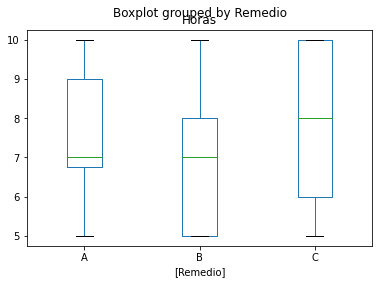

In [187]:
#boxplot agrupando oos dados pelo remédio
tratamento.boxplot(by = 'Remedio', grid = False)

In [188]:
#criação do modelo de regressão linear e execução do teste
modelo1 = ols('Horas ~ Remedio', data = tratamento).fit()
resultados1 = sm.stats.anova_lm(modelo1)
#observar o valor de p maior que 0,05 (pr(>f)) hipotese de que não há diferença significativa
resultados1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [189]:
#Criação do segundo modelo utilizando ais atributos e execução do teste
modelo2 = ols('Horas ~ Remedio * Sexo', data = tratamento).fit()
resultados2 = sm.stats.anova_lm(modelo2)
#nenhum valor de P mostra diferença significativa
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


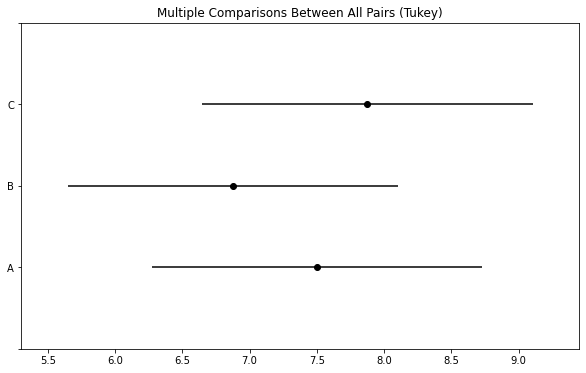

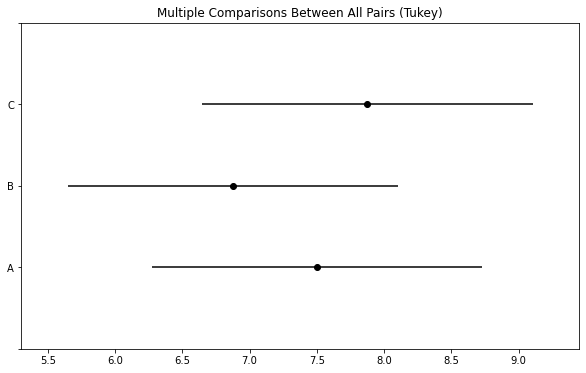

In [190]:
#se houver diferença o teste de tukey é executado
#execução do teste de tukey e visualização dos gráficos com os resultados
mc = MultiComparison(tratamento['Horas'], tratamento['Remedio'])
resultado_teste = mc.tukeyhsd()
print(resultado_teste)

resultado_teste.plot_simultaneous()